In [60]:
import pandas as pd
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer
import string
from nltk.tokenize import RegexpTokenizer
import re
from google.colab import drive
import seaborn as sns
from sklearn import metrics
from datetime import datetime 
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
drive.mount('/content/gdrive')
df = pd.read_csv("/content/gdrive/MyDrive/sexual_violence_project/tweets_with_snscrape_20-22.csv", encoding='utf8')

Mounted at /content/gdrive


In [4]:
#Declarations
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

english_punctuations = string.punctuation
punctuations_list = english_punctuations


In [5]:
#Function Definations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
    
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

def remove_https(text):
  partial_list = text.split(" ")
  ans = ""
  for ele in partial_list:
    if(ele.startswith("https")):
      pass
    else:
      ans+=ele+" "
  return ans

def HashTag_Remover(text):
  temp_list = text.split(" ")
  h_ans = ""
  for ele in temp_list:
    if(ele.startswith("#")):
      pass
    else:
      h_ans+=ele+" "
  return h_ans

def feature_extractor(text):
  Colo_Name = {0:"Fear of retaliation" , 1:"Not aware of assault", 2: "Not aware of assault", 3: "Considered assault as not serious", 4:"Didn’t want to involve others",5: "No proper action taken for accidents", 6: "Anonyms and Non-personal Tweets."}
  score_list = [0,0,0,0,0,0]
  temp_list = text.split(" ")
  for ele in temp_list:
    if F_O_I.count(ele)>0: score_list[0] += 1
    elif N_A_A.count(ele)>0: score_list[1] += 1
    elif C_A_NS.count(ele)>0: score_list[2] += 1
    elif D_W_IO.count(ele)>0: score_list[3] += 1
    elif N_P_APA.count(ele)>0: score_list[4]+=1
    else: score_list[5] += 1
  max = 0
  # print(score_list)
  for cn in score_list:
    if cn > max and cn!=score_list[5]: max = cn
  if max == 0: 
    # print("Hi")
    return Colo_Name[6]
  else: 
    # print(max)
    return Colo_Name[score_list.index(max)+1]

def feature_list(text):
  score_list = [0,0,0,0,0,0]
  temp_list = text.split(" ")
  for ele in temp_list:
    if F_O_I.count(ele)>0: score_list[0] += 1
    elif N_A_A.count(ele)>0: score_list[1] += 1
    elif C_A_NS.count(ele)>0: score_list[2] += 1
    elif D_W_IO.count(ele)>0: score_list[3] += 1
    elif N_P_APA.count(ele)>0: score_list[4]+=1
    else: score_list[5] += 1
  return score_list

In [6]:
df.head()

,Unnamed: 0,Date,User,Tweet
0,0,2022-10-26 14:05:29+00:00,zeroffenders,https://t.co/dXgUDi5fTc\n\nA dentist was charg...
1,1,2022-10-26 12:27:55+00:00,zeroffenders,VIOLADOR:\nCristian Villalobos \nOrtodoncista ...
2,2,2022-10-05 20:47:10+00:00,bottyrubble,#whyididntreport
3,3,2022-10-01 14:55:08+00:00,AmybeTravelling,@MacFarlaneNews Their friends are trying to mu...
4,4,2022-09-29 21:45:18+00:00,zeroffenders,https://t.co/rL5hSiXonW\n\nMost of Dahmer's vi...


In [7]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)


In [8]:
df.head()

,Date,User,Tweet
0,2022-10-26 14:05:29+00:00,zeroffenders,https://t.co/dXgUDi5fTc\n\nA dentist was charg...
1,2022-10-26 12:27:55+00:00,zeroffenders,VIOLADOR:\nCristian Villalobos \nOrtodoncista ...
2,2022-10-05 20:47:10+00:00,bottyrubble,#whyididntreport
3,2022-10-01 14:55:08+00:00,AmybeTravelling,@MacFarlaneNews Their friends are trying to mu...
4,2022-09-29 21:45:18+00:00,zeroffenders,https://t.co/rL5hSiXonW\n\nMost of Dahmer's vi...


In [9]:
df1 = df.drop(['Date','User'],axis=1)

In [10]:
df1.head()

,Tweet
0,https://t.co/dXgUDi5fTc\n\nA dentist was charg...
1,VIOLADOR:\nCristian Villalobos \nOrtodoncista ...
2,#whyididntreport
3,@MacFarlaneNews Their friends are trying to mu...
4,https://t.co/rL5hSiXonW\n\nMost of Dahmer's vi...


In [11]:
df1['Tweet']=df1['Tweet'].str.lower()
df1['Tweet'].tail()

29849    @jdesquiredr @ericahill84 #2: listen to victim...
29850    but rape apologists want more stories of #whyi...
29851    an injustice system that violates cannot be ex...
29852    #violenceagainstwomen\n#whyididntreport\n#beli...
29853    #whathappensaftermetoo #tacklingtheiceberg #me...
Name: Tweet, dtype: object

In [12]:
df1.at[0,'Tweet']

'https://t.co/dxgudi5ftc\n\na dentist was charged with rapes of women.\n\nfarzam mehrabi is accused of meeting women through dating apps before drugging them and sexually assaulting them.\n\n#metoo #whyididntreport #antofagasta #osorno #rapist #25n https://t.co/z7ybj76saj'

In [13]:
#Removing Stop Words From Tweet
STOPWORDS = set(stopwordlist)
df1['Tweet'] = df1['Tweet'].apply(lambda text: cleaning_stopwords(text))
df1['Tweet'].head()

0    https://t.co/dxgudi5ftc dentist charged rapes ...
1    violador: cristian villalobos ortodoncista - c...
2                                     #whyididntreport
3    @macfarlanenews friends trying murder suicidal...
4    https://t.co/rl5hsixonw dahmer's victims kille...
Name: Tweet, dtype: object

In [14]:
#Removing Link/Url From tweet
df1['Tweet'] = df1['Tweet'].apply(lambda x: cleaning_URLs(x))
df1['Tweet'].tail()

29849    @jdesquiredr @ericahill84 #2: listen victims s...
29850    but rape apologists want stories #whyididntrep...
29851    injustice system violates cannot expected admi...
29852    #violenceagainstwomen #whyididntreport #believ...
29853    #whathappensaftermetoo #tacklingtheiceberg #me...
Name: Tweet, dtype: object

In [15]:
#Removing Hashtags From tweet
df1['Tweet'] = df1['Tweet'].apply(lambda x: HashTag_Remover(x))
df1['Tweet'].tail()

29849    @jdesquiredr @ericahill84 listen victims stori...
29850    but rape apologists want stories push changes ...
29851    injustice system violates cannot expected admi...
29852    | state state guide statutes limitations @rain...
29853                                                  se 
Name: Tweet, dtype: object

In [16]:
#Removing Punctuations
df1['Tweet']= df1['Tweet'].apply(lambda x: cleaning_punctuations(x))
df1['Tweet'].tail()

29849    jdesquiredr ericahill84 listen victims stories...
29850    but rape apologists want stories push changes ...
29851    injustice system violates cannot expected admi...
29852      state state guide statutes limitations rainn   
29853                                                  se 
Name: Tweet, dtype: object

In [17]:
#Removing Duplicate Charactert
df1['Tweet'] = df1['Tweet'].apply(lambda x: cleaning_repeating_char(x))
df1['Tweet'].tail()

29849    jdesquiredr ericahill84 listen victims stories...
29850    but rape apologists want stories push changes ...
29851    injustice system violates cannot expected admi...
29852      state state guide statutes limitations rainn   
29853                                                  se 
Name: Tweet, dtype: object

In [18]:
#Removing Numeric numbers from the tweets 
df1['Tweet'] = df1['Tweet'].apply(lambda x: cleaning_numbers(x))
df1['Tweet'].tail()

29849    jdesquiredr ericahill listen victims stories d...
29850    but rape apologists want stories push changes ...
29851    injustice system violates cannot expected admi...
29852      state state guide statutes limitations rainn   
29853                                                  se 
Name: Tweet, dtype: object

In [19]:
df1['Tweet']

0         st charged rapes women farzam mehrabi accused...
1        violador cristian villalobos ortodoncista  chi...
2                                                         
3        macfarlanenews friends trying murder suicidal ...
4         sixonw dahmers victims killed drugged sedativ...
                               ...                        
29849    jdesquiredr ericahill listen victims stories d...
29850    but rape apologists want stories push changes ...
29851    injustice system violates cannot expected admi...
29852      state state guide statutes limitations rainn   
29853                                                  se 
Name: Tweet, Length: 29854, dtype: object

In [20]:
st = nltk.PorterStemmer()
df1['Tweet'] =  df1['Tweet'].apply(lambda x: stemming_on_text(x))
df1['Tweet'].head(5)

0     st charged rapes women farzam mehrabi accused...
1    violador cristian villalobos ortodoncista  chi...
2                                                     
3    macfarlanenews friends trying murder suicidal ...
4     sixonw dahmers victims killed drugged sedativ...
Name: Tweet, dtype: object

In [21]:
lm = nltk.WordNetLemmatizer()
df1['Tweet'] = df1['Tweet'].apply(lambda x: lemmatizer_on_text(x))
df1['Tweet'].head()

0     st charged rapes women farzam mehrabi accused...
1    violador cristian villalobos ortodoncista  chi...
2                                                     
3    macfarlanenews friends trying murder suicidal ...
4     sixonw dahmers victims killed drugged sedativ...
Name: Tweet, dtype: object

In [22]:
df1['Tweet'] = df1['Tweet'].apply(lambda x: remove_https(x))
df1['Tweet'].head()

0     st charged rapes women farzam mehrabi accused...
1    violador cristian villalobos ortodoncista  chi...
2                                                     
3    macfarlanenews friends trying murder suicidal ...
4     sixonw dahmers victims killed drugged sedativ...
Name: Tweet, dtype: object

In [23]:
df1.shape

(29854, 1)

In [24]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29854 entries, 0 to 29853
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   29854 non-null  object
dtypes: object(1)
memory usage: 233.4+ KB


In [25]:
df1.describe()

,Tweet
count,29854
unique,28202
top,
freq,759


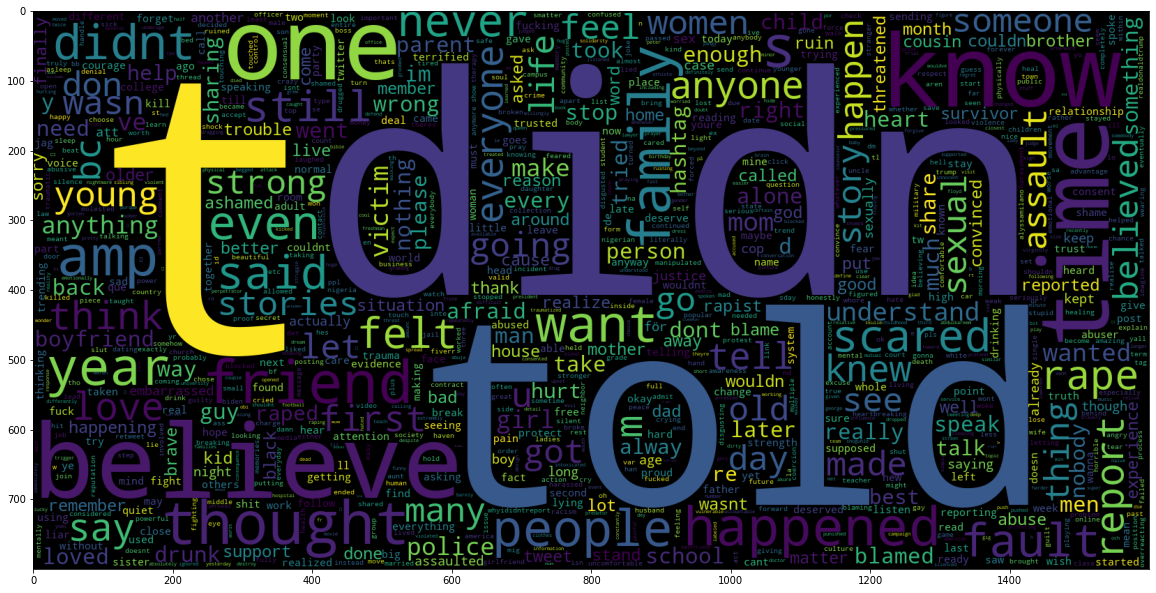

In [26]:
data_pos = df1['Tweet']
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [27]:
F_O_I = [ "bullied", "terrified", "popularity", "blackmail", "kill", "abduction", "nightmares", "revenge", "violent", "beat", "bully", "afraid", "fear", "feared", "scared"]
N_A_A = [ "ignorance", "manipulation", "harsh", "degradation", "aggressive", "illiteracy", "boyfriend", "friend", "brother", "cousin", "kid", "didn’t know", "miseducation"]
C_A_NS = [ "Fault" , "deserve", "drunk" , "naïve", "unbelief", "immoral dressing", "denial", "internalized", "victim-blaming", "attitudes", "mistake"]
D_W_IO = [ "stigmatization", "ashamed", "uncomfortable", "embarrassed", "pity", "guilty", "traumatized", "confused", "rejection", "popular"]
N_P_APA = [ "Evidence", "dilemma", "memory-loss", "tardiness", "delay","reporting", "took me seriously", "believed me"]

In [28]:
F_O_I_temp = "bullied, terrified, popularity, blackmail, kill, abduction, nightmares, revenge, violent, beat, bully, afraid, fear, feared, scared, know, dead, tell, abduct, strong, mean, mad, harassed, violence, threat, threatened, killed, death, pain, control, couldn, silence, destroy"
N_A_A_temp = "ignorance, manipulation, harsh, degradation, aggressive, illiteracy, boyfriend, friend, brother, cousin, kid, didn’t know, miseducation, age, didn’t, love, sister, father, young, know, realize, dad, mom, ignorant, child, molested, learned, learnt, naïve, guilt, girlfriend, partner, children, taught, play, younger, knew, trusted" 
C_A_NS_temp = "fault, deserve, drunk, immoral dressing, denial, internalized victim-blaming attitudes, mistake, deserve, blame, deserved, courage, small, drinking, immoral, serious, sexual, raped, culture, hand, leg, almost, visit, touched, house, late, often, internalized, watched, drinking, smoking, night, lost, ex, contract, self"
D_W_IO_temp = "stigmatization, ashamed, uncomfortable, embarrassed, pity, guilty, traumatized, confused, rejection, popular, secret, neighbor, member, ruin, family, reputation, image, position, kept, future, church, quiet"
N_P_APA_temp = "evidence, dilemma, memory-loss, tardiness, delay, seriously, police, reported, justice, evidence, believed, officer, liar, overreacting, overreact, court, support, understand, unbelief, valid, truth, action, true, heal, blamed, barely, listen, process"
F_O_I_temp = lm.lemmatize(F_O_I_temp)
N_A_A_temp = lm.lemmatize(N_A_A_temp)
C_A_NS_temp = lm.lemmatize(C_A_NS_temp)
D_W_IO_temp = lm.lemmatize(D_W_IO_temp)
N_P_APA_temp = lm.lemmatize(N_P_APA_temp)
F_O_I_temp = F_O_I_temp.lower().replace(" ","")
N_A_A_temp = N_A_A_temp.lower().replace(" ","")
C_A_NS_temp = C_A_NS_temp.lower().replace(" ","")
D_W_IO_temp = D_W_IO_temp.lower().replace(" ","")
N_P_APA_temp = N_P_APA_temp.lower().replace(" ","")
F_O_I = F_O_I_temp.split(",")
N_A_A = N_A_A_temp.split(",")
C_A_NS = C_A_NS_temp.split(",")
D_W_IO = D_W_IO_temp.split(",")
N_P_APA = N_P_APA_temp.split(",")

In [29]:
print(F_O_I)
print(N_A_A)
print(C_A_NS)
print(D_W_IO)
print(N_P_APA)

['bullied', 'terrified', 'popularity', 'blackmail', 'kill', 'abduction', 'nightmares', 'revenge', 'violent', 'beat', 'bully', 'afraid', 'fear', 'feared', 'scared', 'know', 'dead', 'tell', 'abduct', 'strong', 'mean', 'mad', 'harassed', 'violence', 'threat', 'threatened', 'killed', 'death', 'pain', 'control', 'couldn', 'silence', 'destroy']
['ignorance', 'manipulation', 'harsh', 'degradation', 'aggressive', 'illiteracy', 'boyfriend', 'friend', 'brother', 'cousin', 'kid', 'didn’tknow', 'miseducation', 'age', 'didn’t', 'love', 'sister', 'father', 'young', 'know', 'realize', 'dad', 'mom', 'ignorant', 'child', 'molested', 'learned', 'learnt', 'naïve', 'guilt', 'girlfriend', 'partner', 'children', 'taught', 'play', 'younger', 'knew', 'trusted']
['fault', 'deserve', 'drunk', 'immoraldressing', 'denial', 'internalizedvictim-blamingattitudes', 'mistake', 'deserve', 'blame', 'deserved', 'courage', 'small', 'drinking', 'immoral', 'serious', 'sexual', 'raped', 'culture', 'hand', 'leg', 'almost', 'v

In [30]:
m = [1,2,3,4,5]
m.index(1)

0

In [31]:
def feature_extractor(text):
  Colo_Name = {0:"Fear of retaliation" , 1:"Not aware of assault", 2: "Not aware of assault", 3: "Considered assault as not serious", 4:"Didn’t want to involve others",5: "No proper action taken for accidents", 6: "Anonyms and Non-personal Tweets."}
  score_list = [0,0,0,0,0,0]
  temp_list = text.split(" ")
  for ele in temp_list:
    if F_O_I.count(ele)>0: score_list[0] += 1
    elif N_A_A.count(ele)>0: score_list[1] += 1
    elif C_A_NS.count(ele)>0: score_list[2] += 1
    elif D_W_IO.count(ele)>0: score_list[3] += 1
    elif N_P_APA.count(ele)>0: score_list[4]+=1
    else: score_list[5] += 1
  max = 0
  for cn in score_list:
    if cn > max and cn!=score_list[5]: max = cn
  if max == 0: 
    return Colo_Name[6]
  else: 
    return Colo_Name[score_list.index(max)+1]
print(feature_extractor("I did report rape threats when I was emailed and stalked by a classmate. The police and school told me it was my problem. No one even tried to help, except my friends who became bodyguards #whyIdidntreport should be #whydonttheycare"))

No proper action taken for accidents


In [32]:
def feature_list(text):
  score_list = [0,0,0,0,0,0]
  temp_list = text.split(" ")
  for ele in temp_list:
    if F_O_I.count(ele)>0: score_list[0] += 1
    elif N_A_A.count(ele)>0: score_list[1] += 1
    elif C_A_NS.count(ele)>0: score_list[2] += 1
    elif D_W_IO.count(ele)>0: score_list[3] += 1
    elif N_P_APA.count(ele)>0: score_list[4]+=1
    else: score_list[5] += 1
  return score_list
print(feature_list("I did report rape threats when I was emailed and stalked by a classmate. The police and school told me it was my problem. No one even tried to help, except my friends who became bodyguards #whyIdidntreport should be #whydonttheycare"))

[0, 0, 0, 0, 1, 39]


In [34]:
df2 = df1

In [35]:
df2['OutCome'] = df2['Tweet'].apply(lambda x: feature_extractor(x))
df2['OutCome'].value_counts()

Not aware of assault                    13282
Anonyms and Non-personal Tweets.        10111
Considered assault as not serious        2958
No proper action taken for accidents     1932
Didn’t want to involve others            1571
Name: OutCome, dtype: int64

In [36]:
##Lists To Classify Text Into Different Classes 
"""
There Will Be Total of 5 Classes namely:- 
1. Fear of retaliation.
2. Not aware of assault.
3. Considered assault as not serious.
4. Didn’t want to involve others.
5. No proper action taken for prior accidents.
6. Anonyms and Non-personal Tweets.
"""

'\nThere Will Be Total of 5 Classes namely:- \n1. Fear of retaliation.\n2. Not aware of assault.\n3. Considered assault as not serious.\n4. Didn’t want to involve others.\n5. No proper action taken for prior accidents.\n6. Anonyms and Non-personal Tweets.\n'

In [37]:
df2['Features'] = df2['Tweet'].apply(lambda x: feature_list(x))
df2.head(5)

,Tweet,OutCome,Features
0,st charged rapes women farzam mehrabi accused...,Anonyms and Non-personal Tweets.,"[0, 0, 0, 0, 0, 20]"
1,violador cristian villalobos ortodoncista chi...,Anonyms and Non-personal Tweets.,"[0, 0, 0, 0, 0, 17]"
2,,Anonyms and Non-personal Tweets.,"[0, 0, 0, 0, 0, 2]"
3,macfarlanenews friends trying murder suicidal ...,Anonyms and Non-personal Tweets.,"[0, 0, 0, 0, 0, 22]"
4,sixonw dahmers victims killed drugged sedativ...,Not aware of assault,"[1, 0, 0, 0, 0, 18]"


In [38]:
df3 = df2.drop('Tweet',axis=1)

In [39]:
df3.head()

,OutCome,Features
0,Anonyms and Non-personal Tweets.,"[0, 0, 0, 0, 0, 20]"
1,Anonyms and Non-personal Tweets.,"[0, 0, 0, 0, 0, 17]"
2,Anonyms and Non-personal Tweets.,"[0, 0, 0, 0, 0, 2]"
3,Anonyms and Non-personal Tweets.,"[0, 0, 0, 0, 0, 22]"
4,Not aware of assault,"[1, 0, 0, 0, 0, 18]"


In [40]:
X=np.array(df3['Features'].tolist())
y=np.array(df3['OutCome'].tolist())

In [41]:
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [42]:
np.unique(y)

array([0., 1.], dtype=float32)

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [44]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(23883, 6)
(23883, 5)
(5971, 6)
(5971, 5)


In [64]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [66]:
rf.oob_score_

0.986391994305573